In [1]:
from pathlib import Path

In [2]:
base = Path(r"C:\Users\happy\Documents\jupyter scripts\SRraw\sr_paul\data\SRRAW\train")

In [1]:
from zoomdata import ZoomLZoomData
import yaml
from easydict import EasyDict

In [2]:
def load_config(config_file, write_log=True):
    with open(config_file, "r") as f:
        config = yaml.load(f, yaml.FullLoader)
        config = EasyDict(config)
    return config

In [3]:
%cd ..

c:\Users\happy\Documents\jupyter scripts\SRraw\MessiNet


In [8]:
args = load_config('config/first_test.yaml')

In [5]:
args.dataset

{'dir_data': 'r"C:/Users\\happy\\Documents\\jupyter scripts\\SRraw\\sr_paul\\data\\SRRAW"',
 'patch_size': 64}

In [9]:
from pathlib import Path

In [11]:
Path(r"C:/Users\happy\Documents\jupyter scripts\SRraw\sr_paul\data\SRRAW") / 'train'

WindowsPath('C:/Users/happy/Documents/jupyter scripts/SRraw/sr_paul/data/SRRAW/train')

In [12]:
dataset = ZoomLZoomData(args.dataset)

OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못되었습니다: 'r"C:\\Users\\happy\\Documents\\jupyter scripts\\SRraw\\sr_paul\\data\\SRRAW"\\train'

In [3]:
train = list(base.glob("*"))

In [4]:
paths = list((train[0] / "cropped").glob("*"))

In [5]:
import cv2
from PIL import Image
import numpy as np

In [6]:
imgs_path = (train[129] / "aligned").glob("*")
lrs = [cv2.imread(str(p)) for p in imgs_path]

In [7]:
hr = lrs.pop(0)

In [8]:
hr.shape

(2660, 3664, 3)

In [9]:
from matplotlib import pyplot as plt

In [10]:
def imshows(ims, figsize=None, titles=[]):
    figsize = figsize or (len(ims) * 6, 4)
    plt.figure(figsize=figsize)
    for i, im in enumerate(ims):
        plt.subplot(1, len(ims), i + 1)
        plt.imshow(im)
        if len(titles) > i:
            plt.title(titles[i])
    plt.tight_layout()
    plt.show()

In [11]:
def _get_random_patches(hr, lrs, patch_size):
    """Get patches of different random fov for each scale of image"""
    def _get_random_patch(hr, lr, patch_size):
        ih, iw = hr.shape[:2]
        tp = patch_size
        ix = np.random.randint(0, iw - patch_size)
        iy = np.random.randint(0, ih - patch_size)
        hr = hr[iy:iy + tp, ix:ix + tp, :]
        lr = lr[iy:iy + tp, ix:ix + tp, :]
        return hr, lr
    
    hrs = []
    for i, lr in enumerate(lrs):
        h, l = _get_random_patch(hr, lr, patch_size)
        hrs.append(h)
        lrs[i] = l
        
    return hrs, lrs

In [12]:
hrs, lrs = _get_random_patches(hr, lrs, 124)

In [19]:
hrs[1].min()

93

In [29]:
import common

torch.stack(common.np2Tensor(hrs, 255)).shape

torch.Size([6, 3, 124, 124])

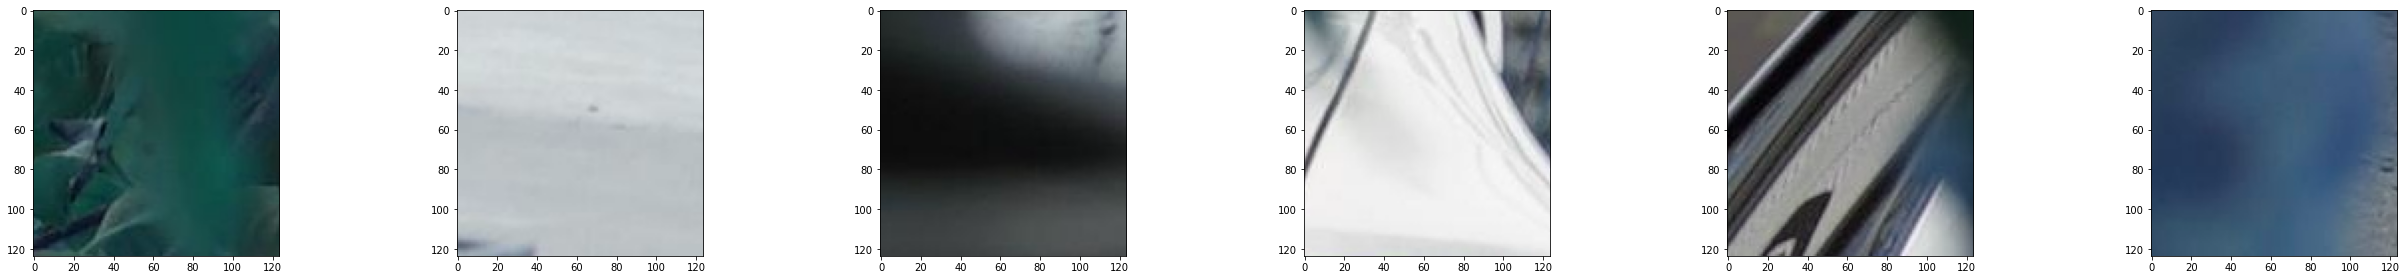

In [13]:
imshows(hrs)

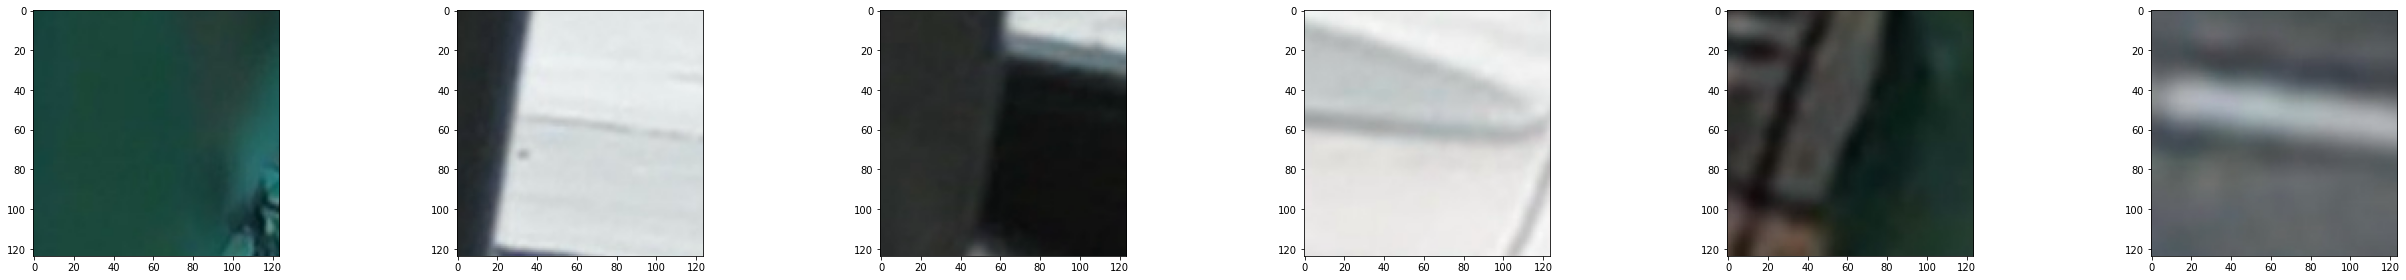

In [14]:
imshows(lrs)

In [10]:
def get_patch(imgs, patch_size, scales):
    ih, iw = imgs[0].shape[:2]
    p = scales if scales is not None else 1
    tp = p * patch_size
    ix = np.random.randint(0, iw - patch_size)
    iy = np.random.randint(0, ih - patch_size)
    tx, ty = np.fix(scales * ix), np.fix(scales * iy)
    tx, ty = tx.astype(int), ty.astype(int)
    output = []
    for i, (x, y) in enumerate(zip(tx, ty)):
        output.append(imgs[i][y:y + tp, x:x + tp, :])
    return output

In [33]:
lrs = get_patch(lrs, 480)

In [34]:
for l in lrs:
    print(l.shape)

(480, 480, 3)
(480, 480, 3)
(480, 480, 3)
(480, 480, 3)
(480, 480, 3)
(480, 480, 3)
(480, 480, 3)


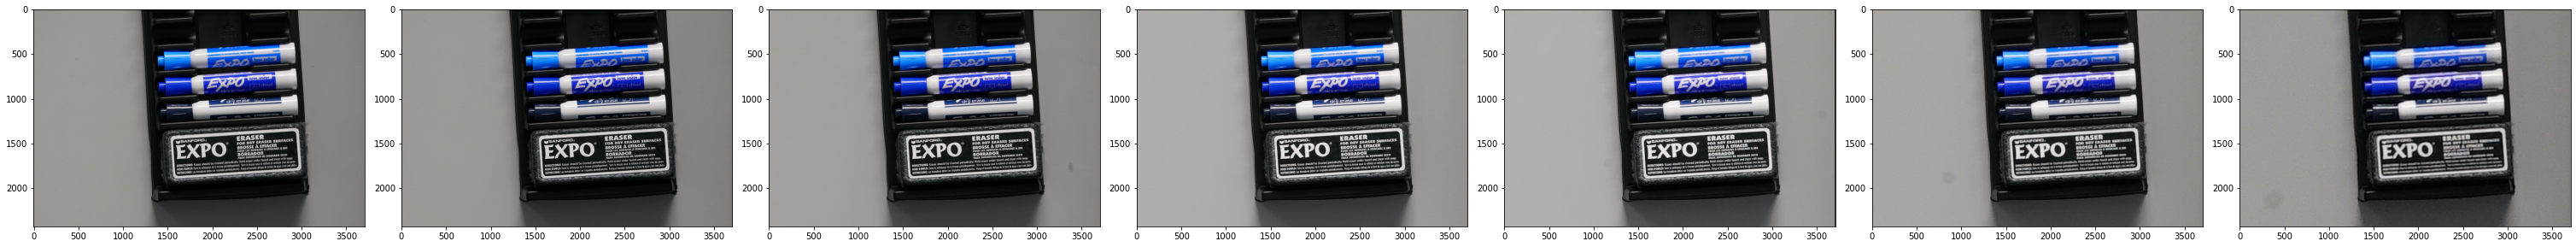

In [37]:
imshows(lrs)

In [ ]:
def get_patch(img_in, img_tar, patch_size, scale, multi_scale=False):
    ih, iw = img_in.shape[:2]

    p = scale if multi_scale else 1
    tp = p * patch_size
    ip = tp // scale

    ix = random.randrange(0, iw - ip + 1)
    iy = random.randrange(0, ih - ip + 1)
    tx, ty = scale * ix, scale * iy

    img_in = img_in[iy:iy + ip, ix:ix + ip, :]
    img_tar = img_tar[ty:ty + tp, tx:tx + tp, :]

    return img_in, img_tar